<div style="text-align: center;">
    <h1 align="center">Tubes UAS Big Data ISKB381355</h1>
    <h3 align="center">Perbandingan kualitas dan popularitas aplikasi di Google Play Store: Berdasarkan rating, jumlah unduhan, tren, kategori, dan preferensi pengguna</h3>
</div>



<center>
    <img src = "https://icocsim.ump.edu.my/images/2020/organizer/logo-ubg.png"  width=40%>

</center>



**Kelompok 8 :**
* Alfi Atqia Rinjani (2201010280)
* Andrian (2201010289)
* Canggih Wahyu Rinaldi (2201010290)



---



# **Pendahuluan:**

<img src = "http://res.heraldm.com/content/image/2021/02/21/20210221000044_0.jpg" width=40%>

Disini kita menggunakan dataset playstore.csv yang berisi tentang bla bla bla

**Import library.**

In [1]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Mount drive dan import dataset.**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Import file csv dari drive

# dataset = '/content/drive/Colab Notebooks/big_data/googleplaystore.csv'
dataset = 'googleplaystore.csv'

ps_data = pd.read_csv(dataset)

In [4]:
# Mengecek 5 data teratas dalam dataset (head)
ps_data.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [5]:
# Mengecek 5 data terakhir dalam dataset (tail)
ps_data.tail(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [6]:
# Jumlah/shape dataset
ps_data.shape

(10841, 13)

In [7]:
# Atribut dalam dataset
ps_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

**Adapun keterangan informasi yang terdapat dalam setiap kolom atribut dalam dataset ini :**

* `App`: Berisi nama aplikasi dengan deskripsi singkat (opsional).
* `Category`: kategori aplikasi.
* `Rating`: Berisi nilai rata-rata yang diberikan oleh pengguna untuk aplikasi tersebut.
* `Reviews`: Berisi jumlah pengguna yang memberikan ulasan untuk aplikasi tersebut.
* `Size`: Menyatakan ruang disk yang dibutuhkan untuk menginstal aplikasi tersebut/besar ukuran aplikasi.
* `Installs`: Berisi angka bulat untuk jumlah aplikasi tersebut diunduh.
* `Type`: Menyatakan apakah aplikasi tersebut gratis atau berbayar.
* `Price`: Berisi harga yang harus dibayar untuk menginstal aplikasi. Untuk aplikasi tipe gratis, harganya nol.
* `Content rating`: Menyatakan apakah aplikasi tersebut cocok untuk semua kelompok usia atau tidak.
* `Genres`: Menyatakan termasuk genre mana aplikasi tersebut.
* `Last updated`: Menyatakan tanggal update terakhir dirilis.
* `Current Ver`: Berisi versi terkini dari aplikasi tersebut.
* `Android Ver`: Berisi versi Android dari aplikasi tersebut.

# **Preprocessing dataset:**

**Data Duplikat.**

In [8]:
# Mengecek data-data duplikat dalam dataset.
ps_data.duplicated().sum()

483

In [9]:
# Drop duplikat value pada dataset.
ps_data= ps_data.drop_duplicates()

In [10]:
ps_data.duplicated().sum()

0

In [11]:
# Jumlah/shape dataset
ps_data.shape

(10358, 13)

**Data Missing value.**

In [12]:
# Cek data missing values
ps_data.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Disini kita harus menghitung persentase jumlah data missing value dalam dataset.

In [13]:
total_miss = sum([True for id,row in ps_data.iterrows() if any(row.isnull())])

persentase = round(total_miss/10358*100, 2)

print(f'Jadi, ada total {total_miss} ({persentase}%) baris data yang memiliki setidaknya 1 missing value.')

Jadi, ada total 1472 (14.21%) baris data yang memiliki setidaknya 1 missing value.


Sehingga, jika menghapus semua data missing maka bisa berpengaruh ke hasil analisanya. Jadi untuk atribut yang jumlah missing valuenya sedikit akan dihapus sedangkan missing value pada atribut `rating` akan kita sispkan data baru berdasarkan nilai mean/median per tiap kategori

In [14]:
ps_data = ps_data[ps_data['Type'].notna()]
ps_data = ps_data[ps_data['Content Rating'].notna()]
ps_data = ps_data[ps_data['Current Ver'].notna()]
ps_data = ps_data[ps_data['Android Ver'].notna()]

In [15]:
# Cek data missing values
ps_data.isnull().sum()

App                  0
Category             0
Rating            1460
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [16]:
# Mencari nilai mean dan median dalam atribut Rating dengan mengecualikan data missing valuenya.

nilai_mean = round(ps_data[~ps_data['Rating'].isnull()]['Rating'].mean(),1)

nilai_median = ps_data[~ps_data['Rating'].isnull()]['Rating'].median()

[nilai_mean, nilai_median]

[4.2, 4.3]

Visualisasi nilainya dengan boxplot and a distplot.

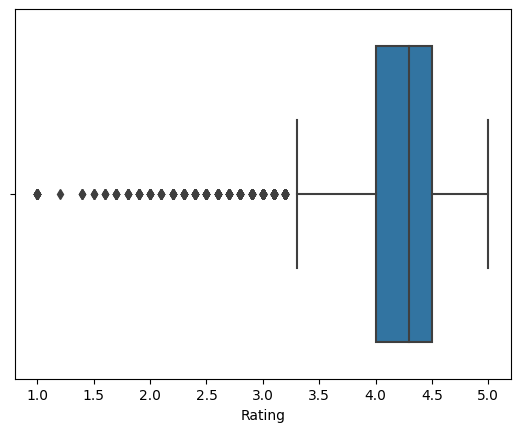

In [17]:
# Boxplot
sns.boxplot(data = ps_data['Rating'],x = ps_data['Rating']);

Text(0, 0.5, 'Jumlah')

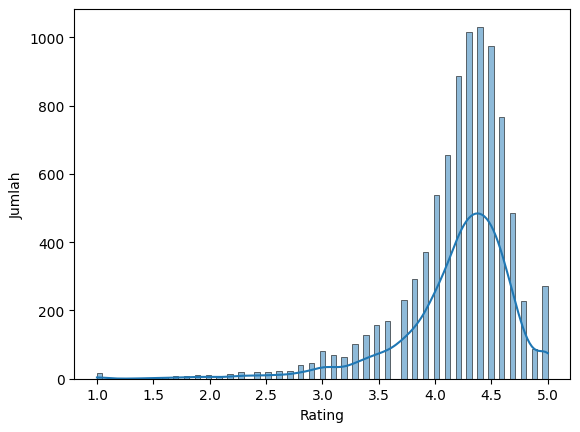

In [18]:
# Distplot
sns.histplot(ps_data['Rating'], kde=True)
plt.ylabel('Jumlah')

In [19]:
# Menambhkan nilai median ke dalam missing value'Rating'
ps_data['Rating'].fillna(value=nilai_median, inplace=True)

In [20]:
# Cek data missing values
ps_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

**Mengubah tipe data atribut `Price` dari string ke float.**





In [21]:
ps_data['Price'].value_counts()

0          9584
$0.99       144
$2.99       125
$1.99        73
$4.99        70
           ... 
$389.99       1
$19.90        1
$1.75         1
$14.00        1
$1.04         1
Name: Price, Length: 92, dtype: int64

Untuk mengubah nilainya dari string menjadi float, pertama-tama kita harus menghilangkan simbol $ dari semua nilainya.

In [22]:
# Membuat fungsi drop-dollar
def drop_dollar(val):
  if '$' in val:
    return float(val[1:])
  else:
    return float(val)

In [23]:
ps_data['Price'] = ps_data['Price'].apply(lambda x: drop_dollar(x))
ps_data['Price'].value_counts()

0.00      9584
0.99       144
2.99       125
1.99        73
4.99        70
          ... 
389.99       1
19.90        1
1.75         1
14.00        1
1.04         1
Name: Price, Length: 92, dtype: int64

**Mengubah tipe data atribut `Installs` dari string ke integer.**

In [24]:
ps_data['Installs'].value_counts()

1,000,000+        1487
10,000,000+       1132
100,000+          1129
10,000+           1031
1,000+             888
100+               709
5,000,000+         683
500,000+           516
50,000+            473
5,000+             468
10+                384
100,000,000+       369
500+               328
50,000,000+        272
50+                204
5+                  82
1+                  67
500,000,000+        61
1,000,000,000+      49
0+                  14
Name: Installs, dtype: int64

Untuk mengubah nilainya dari string menjadi int, kita harus menghilangkan simbol + dan , dari semua nilainya seperti $ pada langkah sebelumnya.

In [25]:
def drop_plus(val):
  if '+' and ',' in val:
    new = int(val[:-1].replace(',',''))
    return new
  elif '+' in val:
    new1 = int(val[:-1])
    return new1
  else:
    return int(val)

In [26]:
ps_data['Installs'] = ps_data['Installs'].apply(lambda x: drop_plus(x))
ps_data.sample()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4088,Pinterest,SOCIAL,4.6,4300936,Varies with device,100000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device


**Terakhir mengubah tipe data value atr `Reviews` dari string ke int.**

In [27]:
ps_data['Reviews'] = ps_data['Reviews'].astype(int)
ps_data.sample()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10489,Offroad Cruiser,FAMILY,4.3,42432,36M,1000000,Free,0.0,Everyone,Simulation,"July 13, 2016",1.3,2.3.3 and up


# **Visualisasi EDA:**

Setelah melakukan preprocessing. Sekarang kita dapat melakukan eksplorasi dan visualisasi data untuk mendapatkan beberapa insight dari dataset kita.

**1. Korelasi dan distribusi antar atribut**

In [28]:
# Mengetahui korelasi antara atribut-atribut dalam play store dataset
ps_data.corr()

<ipython-input-28-de04cb3d8a9c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ps_data.corr()


,Rating,Reviews,Installs,Price
Rating,1.000000,0.063472,0.044829,-0.019721
Reviews,0.063472,1.000000,0.634987,-0.009424
Installs,0.044829,0.634987,1.000000,-0.011155
Price,-0.019721,-0.009424,-0.011155,1.000000


<ipython-input-29-97e18adb6fa6>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ps_data.corr(), annot=True, cmap='coolwarm')


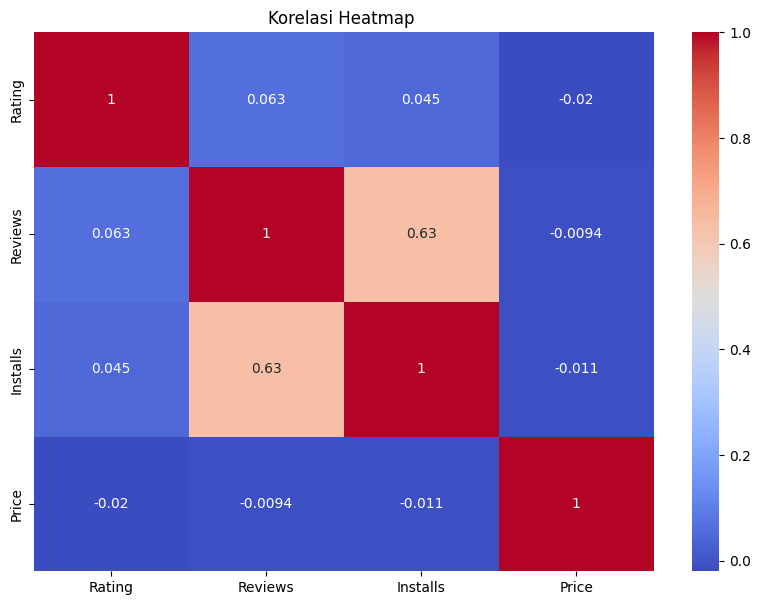

In [29]:
# Tampilan dengan Correlation heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(ps_data.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Heatmap ')
plt.show()


* Terdapat korelasi positif yang kuat antara kolom `Review` dan `Install`. Hal ini cukup jelas. Semakin tinggi jumlah Install, semakin tinggi pula basis pengguna, dan semakin tinggi pula jumlah ulasan yang diberikan oleh pengguna.
* `Harga` sedikit berkorelasi negatif dengan `Rating`, `Review`, dan `Install`. Ini berarti bahwa ketika harga aplikasi meningkat, peringkat rata-rata, jumlah total ulasan, dan Install akan turun sedikit.
* `Rating` sedikit berkorelasi positif dengan kolom `Installs` dan `Reviews`. Hal ini menunjukkan bahwa seiring dengan meningkatnya rating rata-rata pengguna, Install aplikasi dan jumlah ulasan juga meningkat.

Adapun Visualisasi distribusi atribut `Harga`, `Rating`, `Review`, dan `Install`

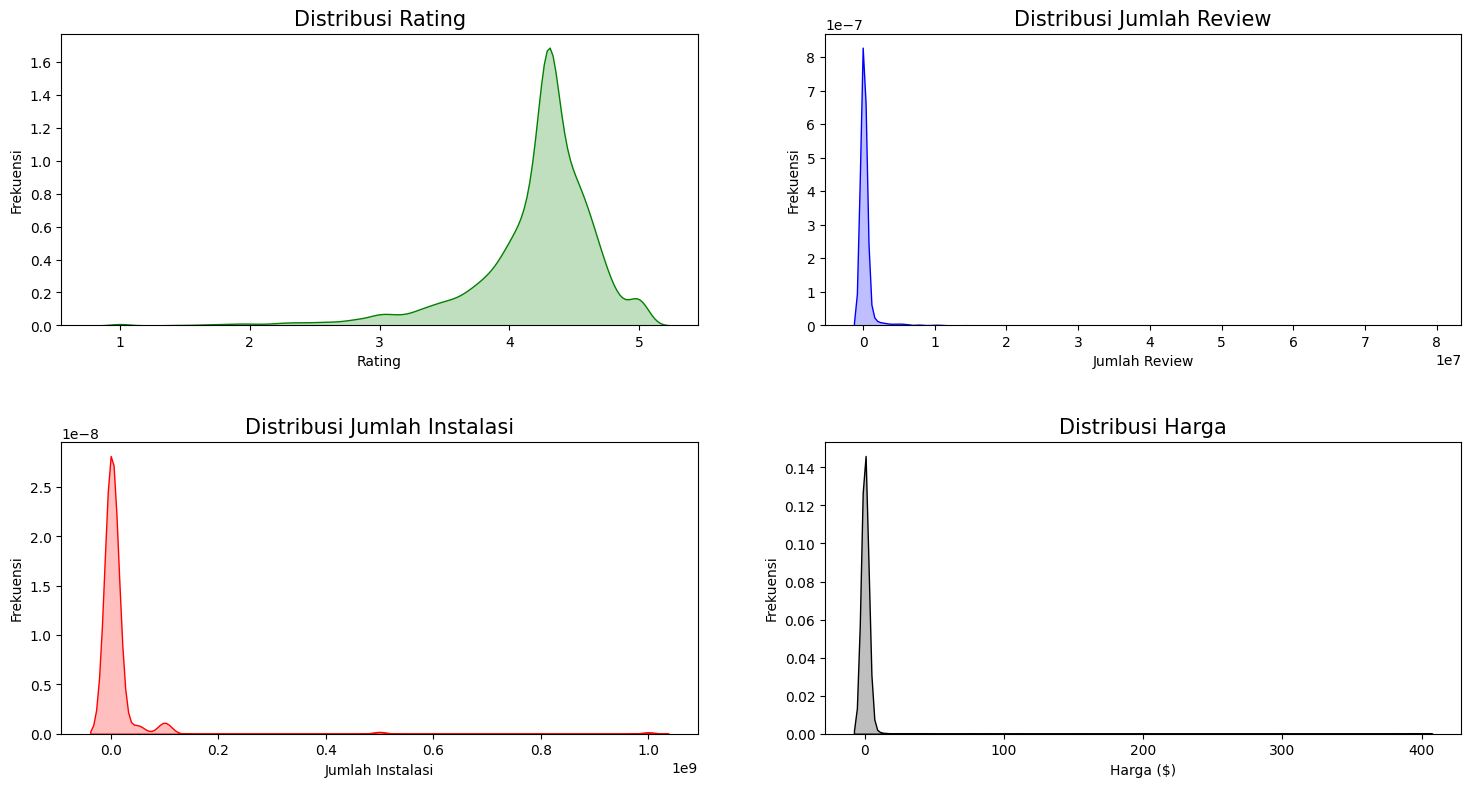

In [30]:
plt.figure(figsize=(20, 10))

# Plot 1: Distribusi Rating
plt.subplot(2, 2, 1)
plt.xlabel("Rating")
plt.ylabel("Frekuensi")
sns.kdeplot(ps_data["Rating"], color="green", fill=True)
plt.title('Distribusi Rating', size=15)

# Plot 2: Distribusi Jumlah Review
plt.subplot(2, 2, 2)
plt.xlabel("Jumlah Review")
plt.ylabel("Frekuensi")
sns.kdeplot(ps_data["Reviews"], color="blue", fill=True)
plt.title('Distribusi Jumlah Review', size=15)

# Plot 3: Distribusi Jumlah Instalasi
plt.subplot(2, 2, 3)
plt.xlabel("Jumlah Instalasi")
plt.ylabel("Frekuensi")
sns.kdeplot(ps_data["Installs"], color="red", fill=True)
plt.title('Distribusi Jumlah Instalasi', size=15)

# Plot 4: Distribusi Harga
plt.subplot(2, 2, 4)
plt.xlabel("Harga ($)")
plt.ylabel("Frekuensi")
sns.kdeplot(ps_data["Price"], color="black", fill=True)
plt.title('Distribusi Harga', size=15)

plt.subplots_adjust(left=0.2, bottom=0.2, right=0.9, top=0.9, wspace=0.2, hspace=0.4)
plt.show()


**2. Persentase jumlah tipe aplikasi berbayar dan gratis (`free` dan `paid`)**

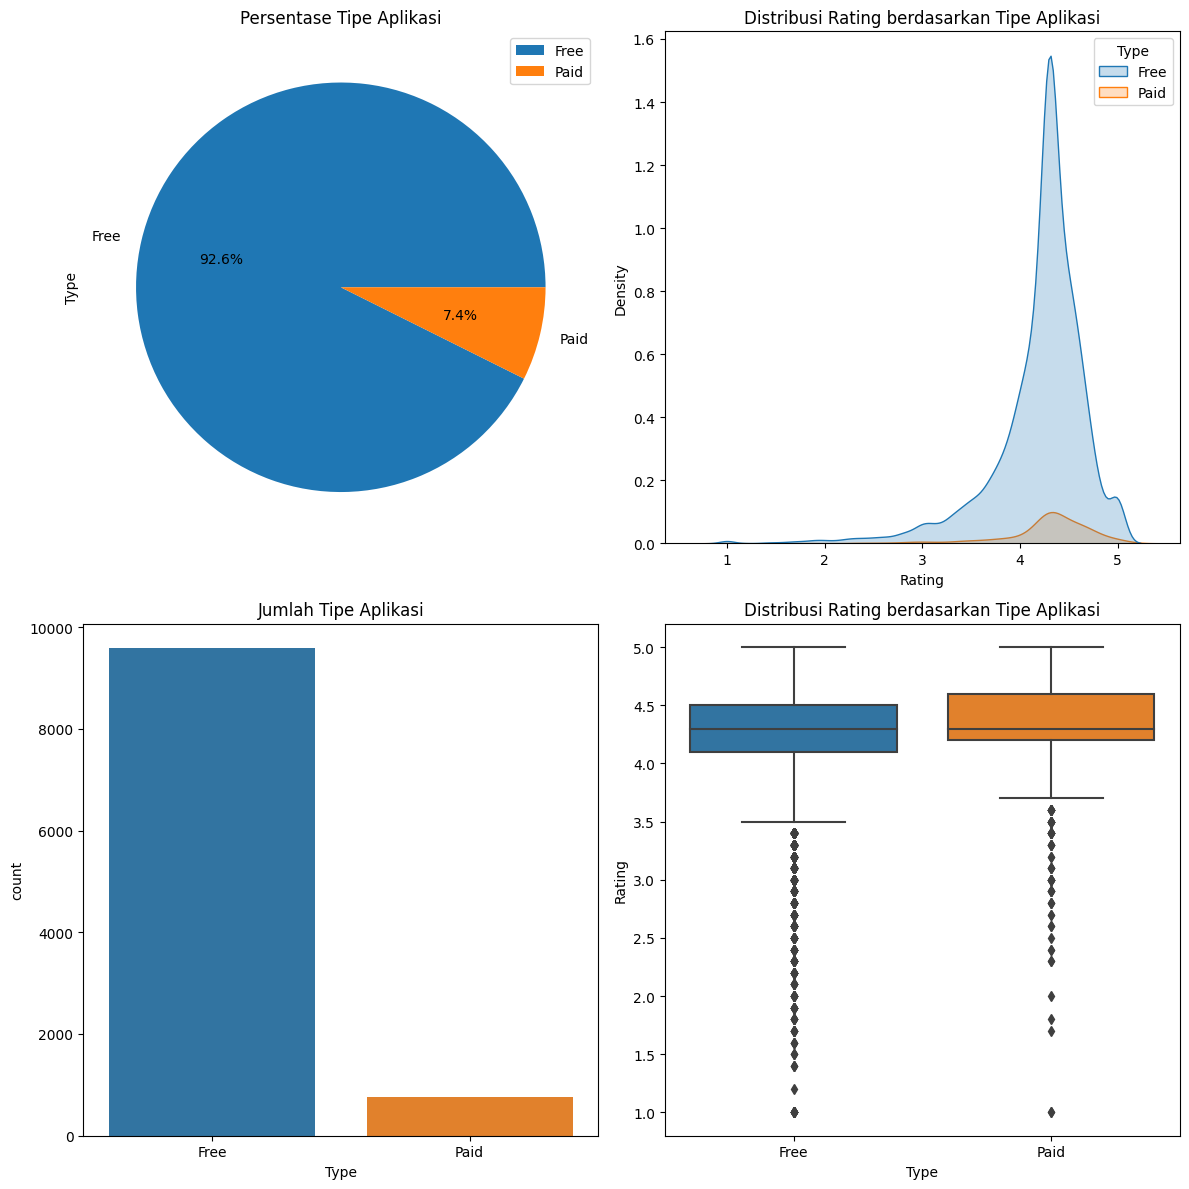

In [31]:
plt.figure(figsize=(12, 12))

# Plot 1 - Pie Chart: Persentase aplikasi gratis dan berbayar
plt.subplot(2, 2, 1)
ps_data['Type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Persentase Tipe Aplikasi")
plt.legend()

# Plot 2 - KDE Plot: Distribusi rating berdasarkan tipe aplikasi
plt.subplot(2, 2, 2)
sns.kdeplot(data=ps_data, x="Rating", hue='Type', fill=True)
plt.title("Distribusi Rating berdasarkan Tipe Aplikasi")

# Plot 3 - Bar Plot: Jumlah Tipe Aplikasi
plt.subplot(2, 2, 3)
sns.countplot(data=ps_data, x='Type')
plt.title("Jumlah Tipe Aplikasi")

# Plot 4 - Box Plot: Distribusi rating berdasarkan tipe aplikasi
plt.subplot(2, 2, 4)
sns.boxplot(data=ps_data, x='Type', y='Rating')
plt.title("Distribusi Rating berdasarkan Tipe Aplikasi")

plt.tight_layout()
plt.show()

Disini bisa kita simpulkan bahwa kebanyakan app di play store itu gratis (92.6% free). Dan berbayar dan tidaknya aplikasi ternyata tidak terlalu mempengaruhi rating.

**3. Eksplorasi Content-rating (Batasan usia)**

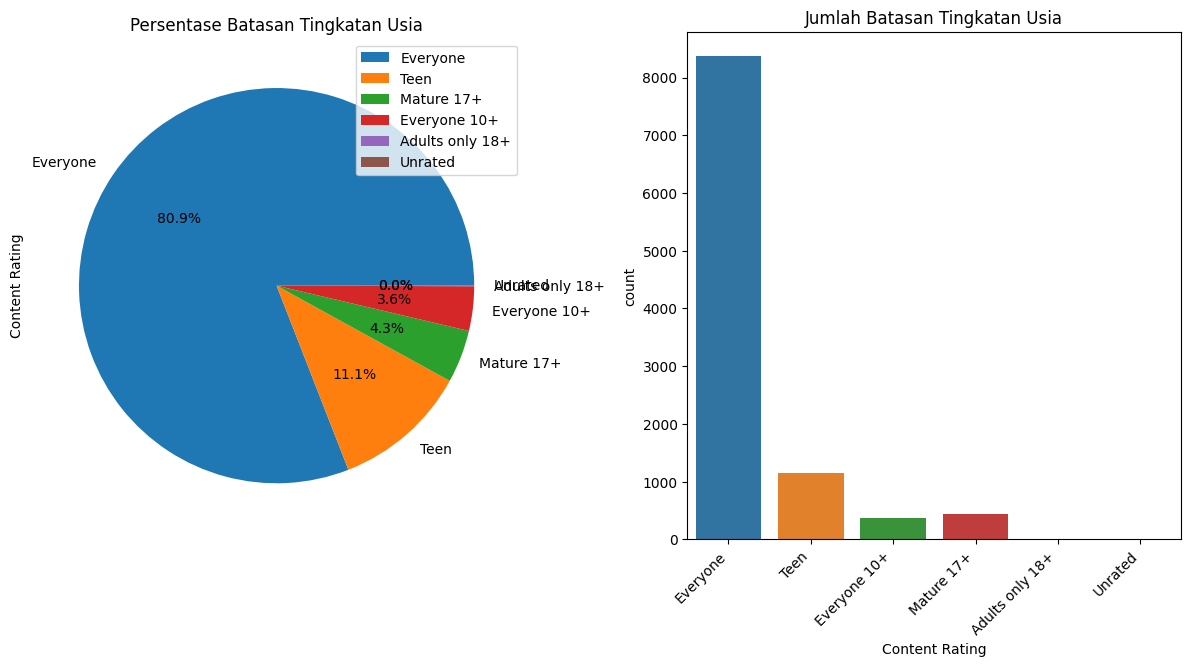

In [32]:
plt.figure(figsize=(12, 12))

# Plot 1 - Pie Chart: Persentase berdasarkan batasan tingkatan usia
plt.subplot(2, 2, 1)
ps_data['Content Rating'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Persentase Batasan Tingkatan Usia")
plt.legend()

# Plot 2 - Bar Plot: Jumlah Batasan Tingkatan Usia
plt.subplot(2, 2, 2)
sns.countplot(data=ps_data, x='Content Rating')
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")
plt.title("Jumlah Batasan Tingkatan Usia")


plt.tight_layout()
plt.show()

Rata-rata app di play store bisa digunakan semua orang tanpa batasan usia (81.8%). Sisanya ada batasan usia tertentu untuk menggunakannya.

**4. Jumlah aplikasi ditiap kategori aplikasi.**

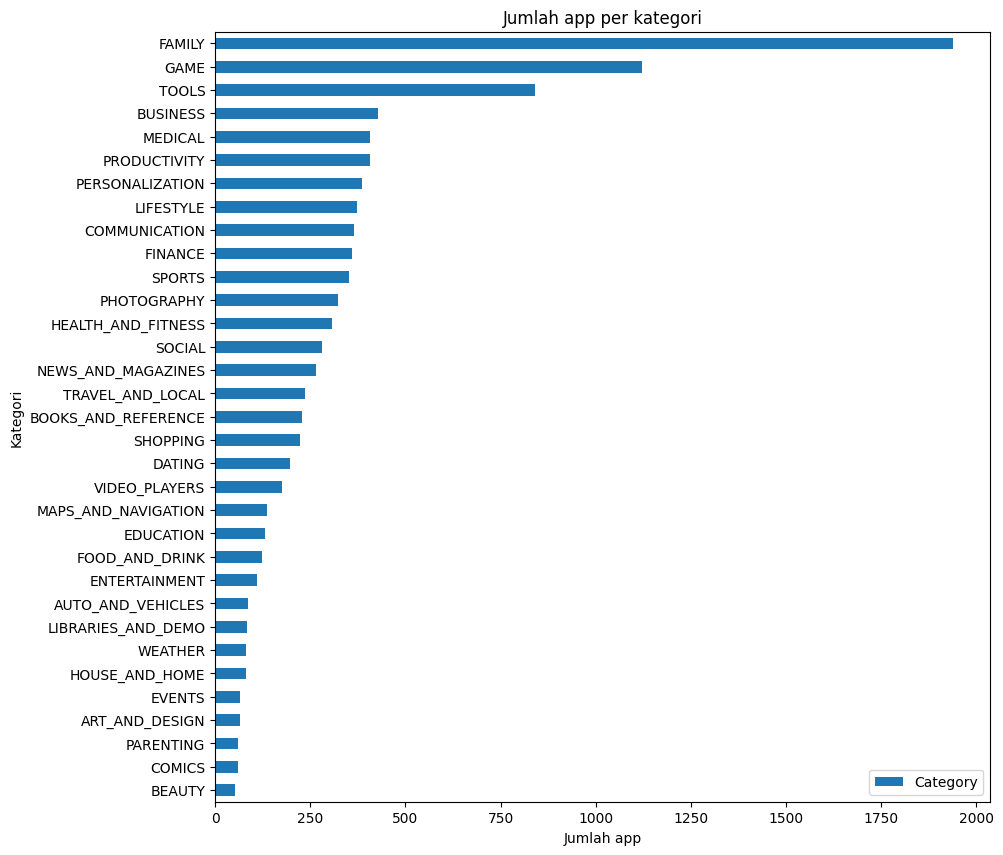

In [33]:
ps_data['Category'].value_counts().plot.barh(figsize=(10,10)).invert_yaxis()
plt.ylabel('Kategori')
plt.xlabel('Jumlah app')
plt.title('Jumlah app per kategori')
plt.legend()


Dari visualisasi ini kita bisa tau seberapa kompetitif kategori tertentu di play store. Kategori `Family`, `Game`, dan `Tools` memiliki jumlah aplikasi terbanyak dibandingkan dengan kategori lainnya.

**5. Kategori Populer berdasarkan app installs (Jumlah unduhan)**

Text(0.5, 1.0, 'Top 10 Kategori Populer berdasarkan Jumlah Unduhan')

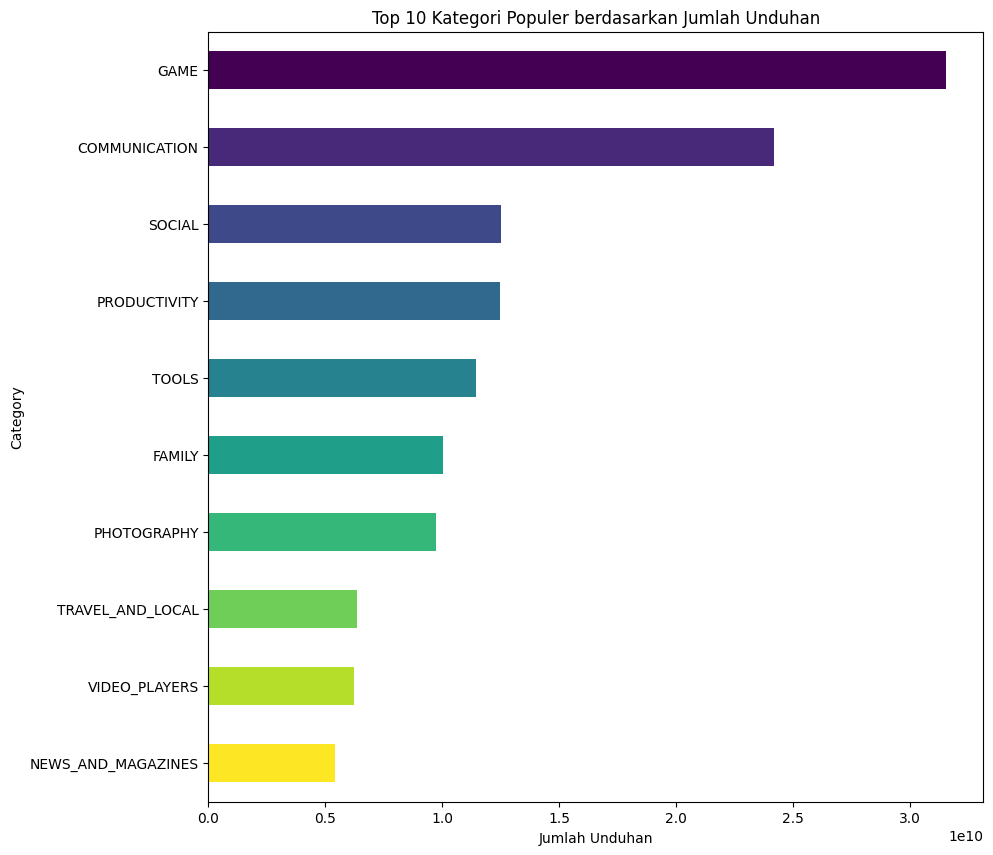

In [34]:
popular_categories = ps_data.groupby('Category')['Installs'].sum().sort_values(ascending=False)[:10]
colors = plt.cm.viridis(np.linspace(0, 1, len(popular_categories)))
popular_categories.plot.barh(figsize=(10, 10), color=colors)
plt.gca().invert_yaxis()
plt.xlabel('Jumlah Unduhan')
plt.title('Top 10 Kategori Populer berdasarkan Jumlah Unduhan')

Disini menunjukkan bahwa kategori aplikasi `Game`, `Communication` dan `Tools` memiliki jumlah penginstalan tertinggi (paling populer) dibandingkan dengan kategori aplikasi lainnya.

**6. Eksplorasi rata-rata rating aplikasi**

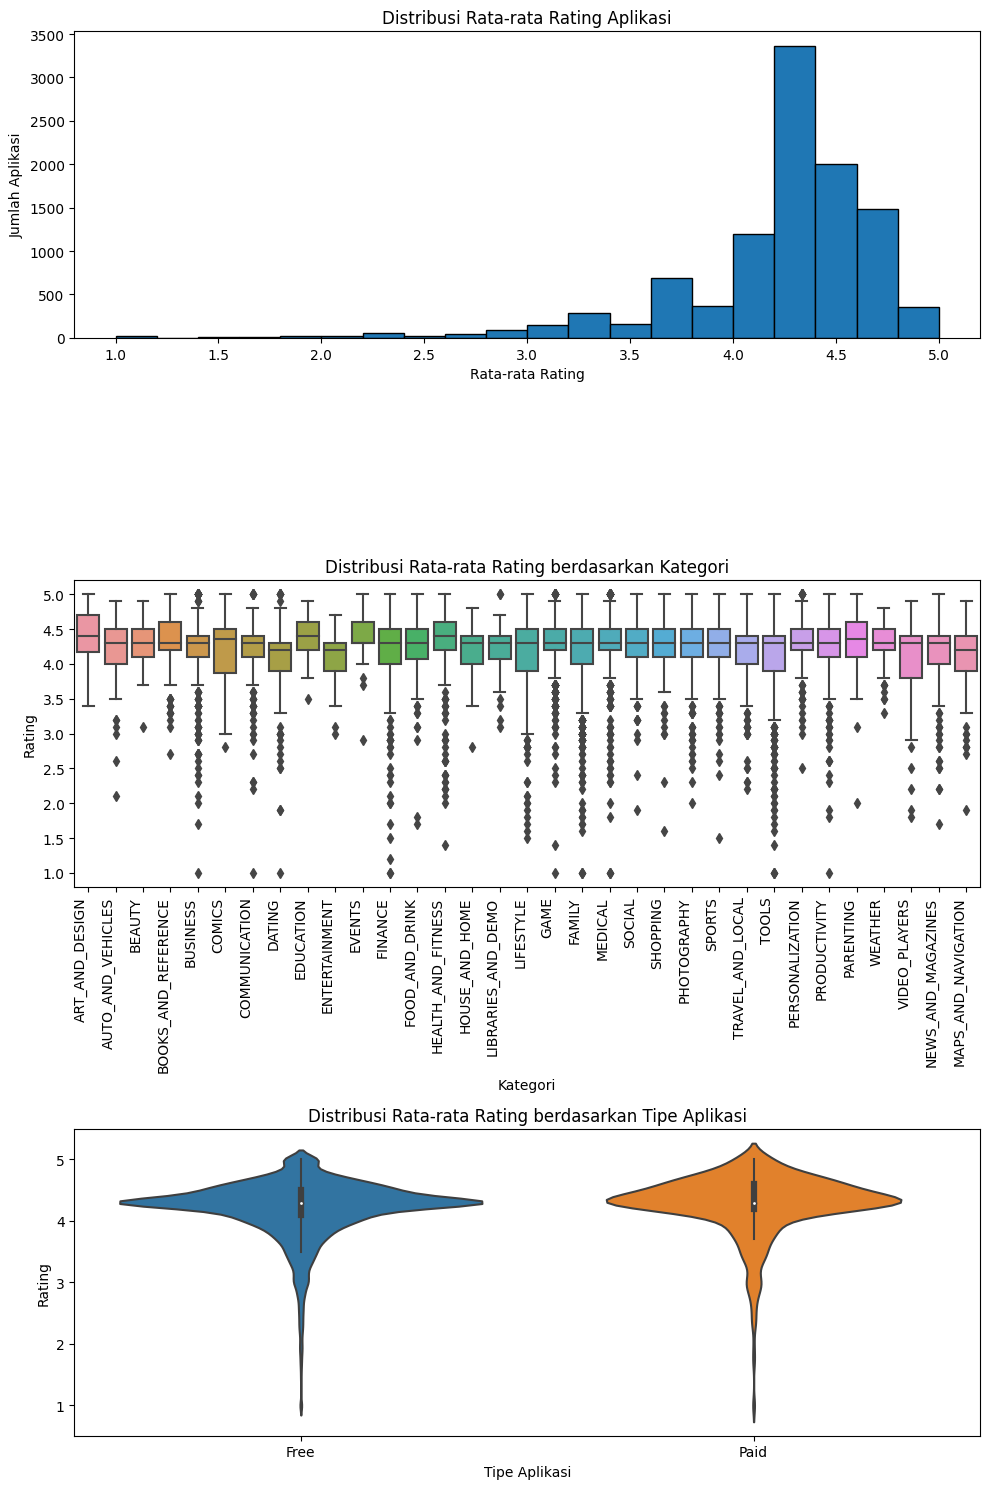

In [35]:
plt.figure(figsize=(10, 15))

# Plot 1 - Histogram: Distribusi rata-rata rating aplikasi
plt.subplot(3, 1, 1)
ps_data['Rating'].plot.hist(bins=20, edgecolor='black')
plt.xlabel('Rata-rata Rating')
plt.ylabel('Jumlah Aplikasi')
plt.title('Distribusi Rata-rata Rating Aplikasi')

# Plot 2 - Box Plot: Distribusi rata-rata rating berdasarkan kategori
plt.subplot(3, 1, 2)
sns.boxplot(data=ps_data, x='Category', y='Rating')
plt.xlabel('Kategori')
plt.ylabel('Rating')
plt.title('Distribusi Rata-rata Rating berdasarkan Kategori')
plt.xticks(rotation=90, ha='right')

# Plot 3 - Violin Plot: Distribusi rata-rata rating berdasarkan tipe aplikasi
plt.subplot(3, 1, 3)
sns.violinplot(data=ps_data, x='Type', y='Rating')
plt.xlabel('Tipe Aplikasi')
plt.ylabel('Rating')
plt.title('Distribusi Rata-rata Rating berdasarkan Tipe Aplikasi')

plt.tight_layout()
plt.show()



**7. Representasi rata rata rating**

Kita dapat merepresentasikan rating dengan cara yang lebih baik jika kita mengelompokkan rating diantara interval tertentu. Di sini, kita coba mengelompokkan rating sebagai berikut:

* `4-5`: Rating tinggi
* `3-4`: Diatas rata-rata
* `2-3`: Rata-rata
* `1-2`: Dibawah rata-rata

Pertama buat dulu atribut baru dengan nama `Rating group` ke dataset.

In [36]:
def rata_rata_rating(val):
  if val>=4:
    return 'Rating tinggi'
  elif val>=3 and val<4:
    return 'Diatas rata-rata'
  elif val>=2 and val<3:
    return 'Rata-rata'
  else:
    return 'Dibawah rata-rata'

In [37]:
# Panggil fungsi
ps_data['Rating Group'] = ps_data['Rating'].apply(lambda x: rata_rata_rating(x))

**Visualisasi Rating Grup**

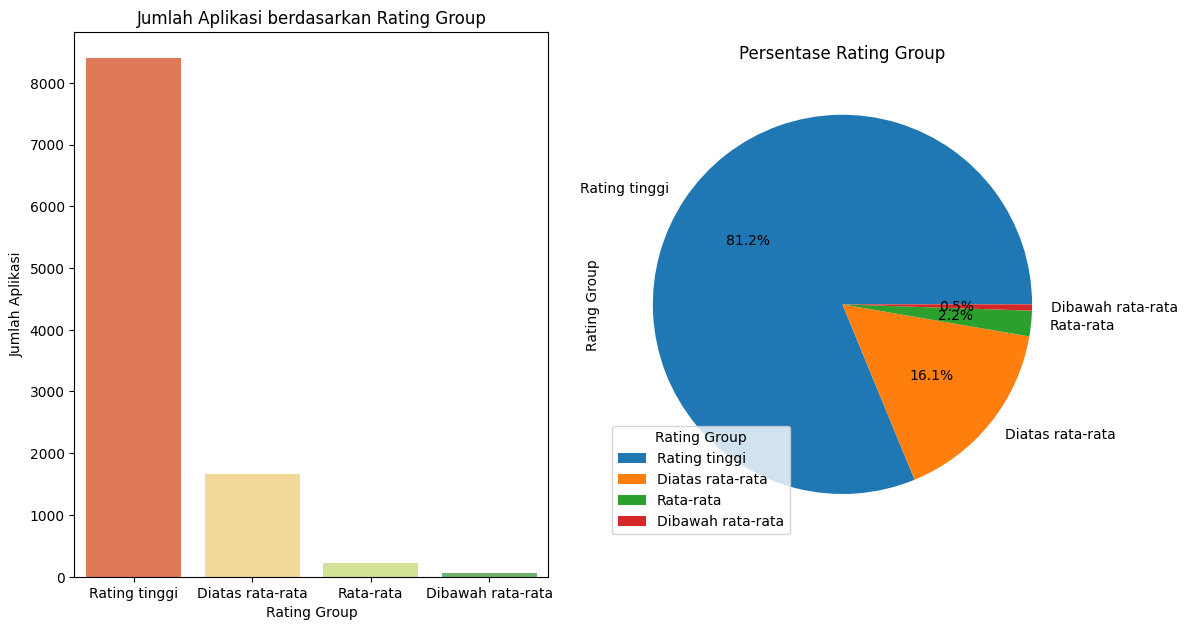

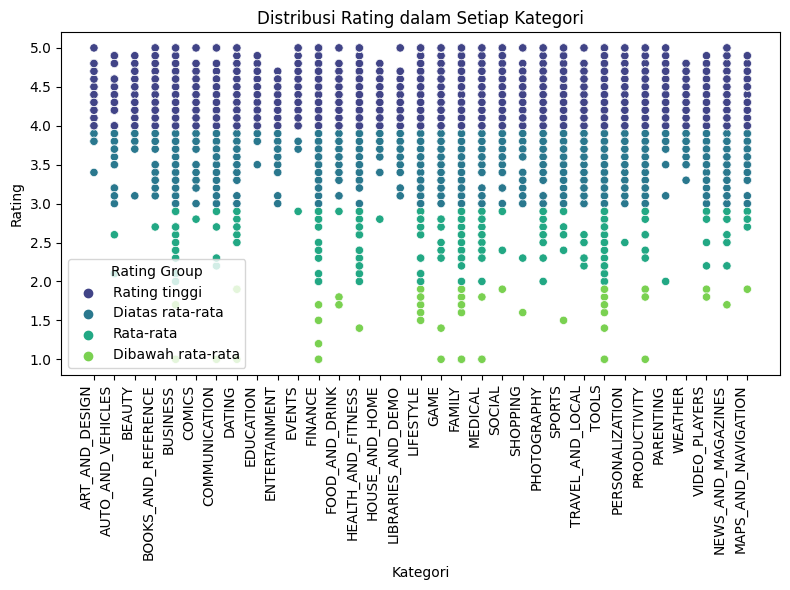

In [38]:
plt.figure(figsize=(12, 12))

# Plot 1 - Bar Plot: Jumlah Aplikasi berdasarkan Rating Group
plt.subplot(2, 2, 1)
sns.countplot(data=ps_data, x='Rating Group', palette='RdYlGn')
plt.xlabel('Rating Group')
plt.ylabel('Jumlah Aplikasi')
plt.title('Jumlah Aplikasi berdasarkan Rating Group')

# Plot 2 - Pie Chart: Persentase Rating Group
plt.subplot(2, 2, 2)
ps_data['Rating Group'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Persentase Rating Group')
plt.legend(title='Rating Group')
plt.tight_layout()

# Plot 2 - scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=ps_data, x='Category', y='Rating', hue='Rating Group', palette='viridis')
plt.xlabel('Kategori')
plt.ylabel('Rating')
plt.title('Distribusi Rating dalam Setiap Kategori')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Rating Group')
plt.tight_layout()


plt.show()


**8. Top 15 aplikasi dengan jumlah review dan unduhan terbanyak**

<ipython-input-39-97d6529af686>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ps_data.groupby('App')[['Reviews','App']].sum().nlargest(15,['Reviews']).plot.barh(figsize = (10,5), color = 'pink').invert_yaxis()
<ipython-input-39-97d6529af686>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ps_data.groupby('App')[['Installs','App']].sum().nlargest(15,['Installs']).plot.barh(figsize = (10,5), color = 'purple').invert_yaxis()


<Figure size 1000x800 with 0 Axes>

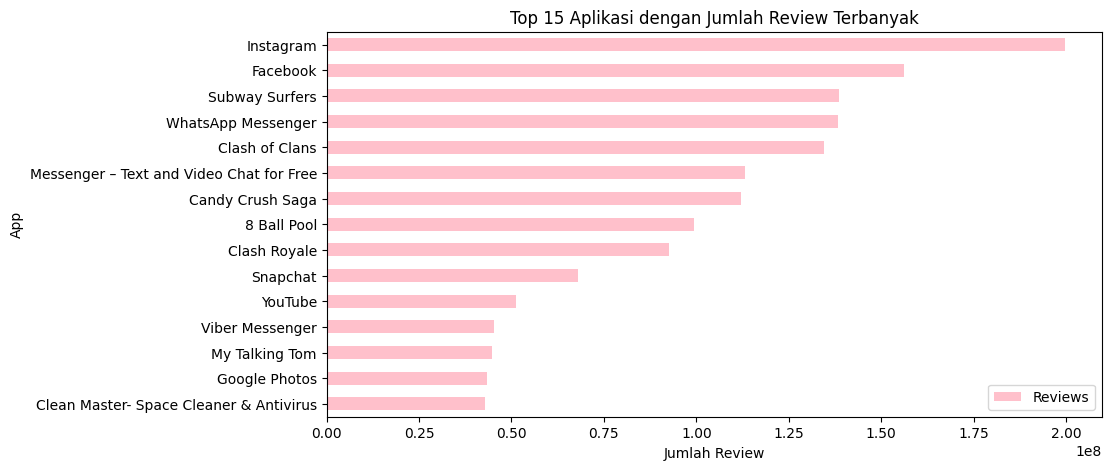

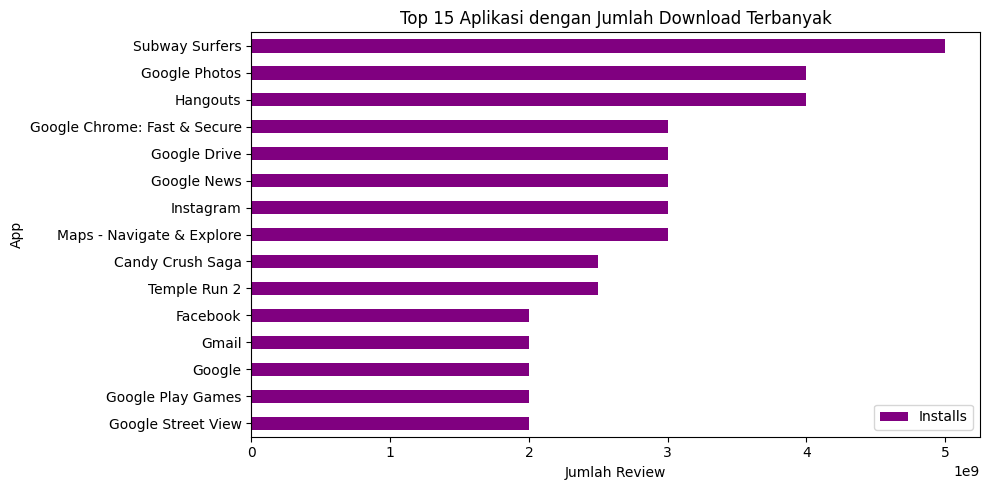

In [39]:
plt.figure(figsize=(10, 8))

# Top 15 App yang Paling Banyak Direiew
ps_data.groupby('App')[['Reviews','App']].sum().nlargest(15,['Reviews']).plot.barh(figsize = (10,5), color = 'pink').invert_yaxis()
plt.xlabel('Jumlah Review')
plt.title('Top 15 Aplikasi dengan Jumlah Review Terbanyak')

# Top 15 App yang Paling Banyak DiDownload
ps_data.groupby('App')[['Installs','App']].sum().nlargest(15,['Installs']).plot.barh(figsize = (10,5), color = 'purple').invert_yaxis()
plt.xlabel('Jumlah Review')
plt.title('Top 15 Aplikasi dengan Jumlah Download Terbanyak')

plt.tight_layout()
plt.show()

Bisa dikatakan bahwa aplikasi dengan jumlah download dan review pengguna terbanyak adalah aplikasi terpopuler di play store.

**9. Top 15 aplikasi berbayar paling mahal**

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25105 (\N{CJK UNIFIED IDEOGRAPH-6211}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24456 (\N{CJK UNIFIED IDEOGRAPH-5F88}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26377 (\N{CJK UNIFIED IDEOGRAPH-6709}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37666 (\N{CJK UNIFIED IDEOGRAPH-9322}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


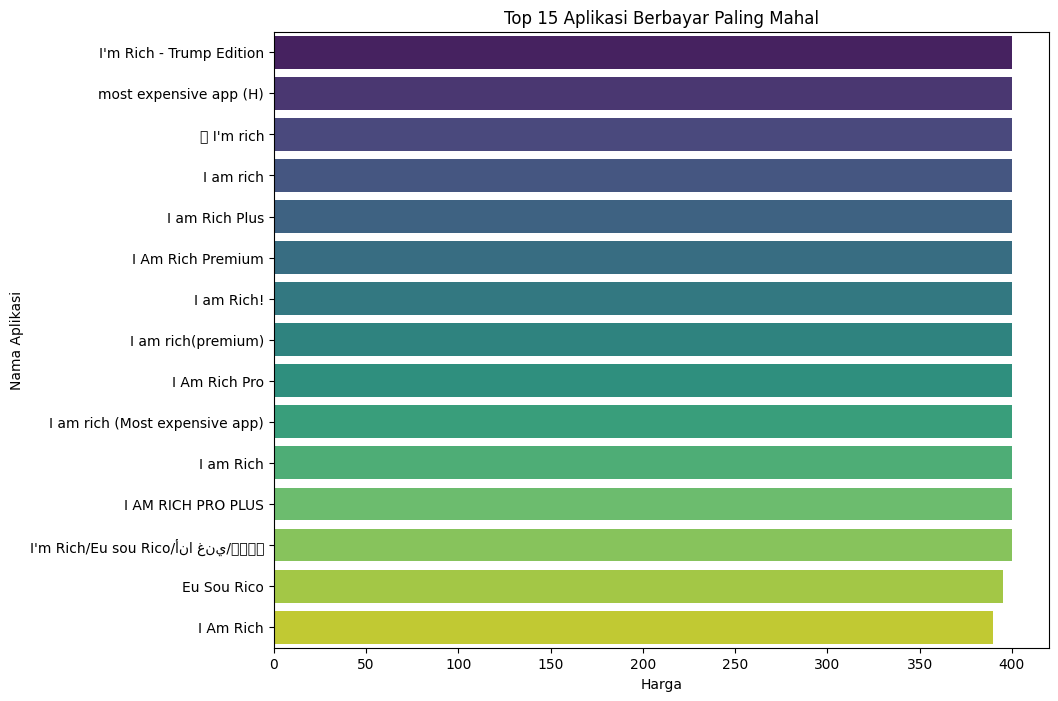

In [40]:
plt.figure(figsize=(10, 8))

# Mengurutkan berdasarkan harga dari yang paling mahal dan mengambil 15 teratas
top_15_expensive_apps = ps_data[ps_data['Type'] == 'Paid'].nlargest(15, 'Price')

sns.barplot(data=top_15_expensive_apps, x='Price', y='App', palette='viridis')
plt.xlabel('Harga')
plt.ylabel('Nama Aplikasi')
plt.title('Top 15 Aplikasi Berbayar Paling Mahal')

plt.show()


**10. Aplikasi dengan penghasilan terbanyak**

<ipython-input-41-6d773438d7f7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app_berbayar['Pendapatan'] = app_berbayar['Installs']*app_berbayar['Price']


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


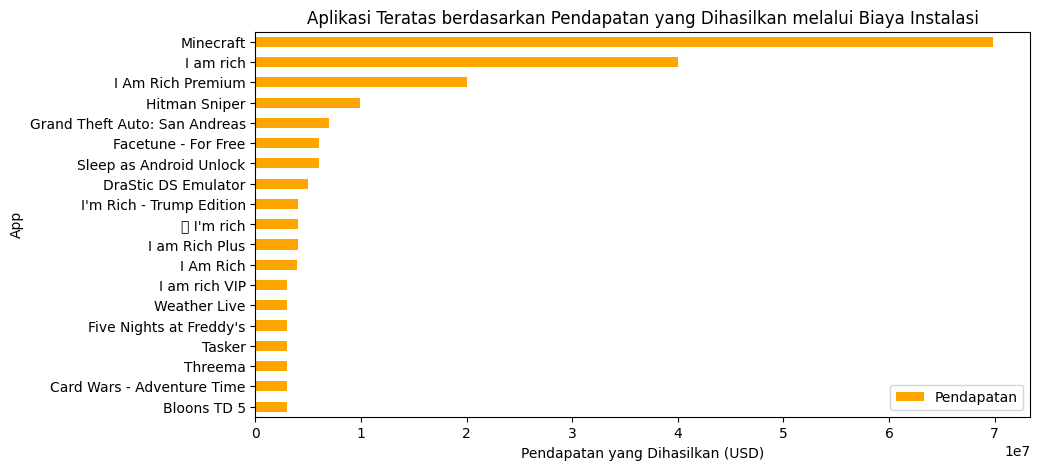

In [41]:
#Aplikasi berdasarkan Pendapatan yang Dihasilkan
app_berbayar = ps_data[ps_data['Type'] == 'Paid']
app_berbayar['Pendapatan'] = app_berbayar['Installs']*app_berbayar['Price']
total_pendapatan = app_berbayar.nlargest(20, 'Pendapatan')
total_pendapatan.groupby('App')['Pendapatan'].mean().sort_values().plot.barh(figsize=(10,5), color='orange')
plt.xlabel('Pendapatan yang Dihasilkan (USD)')
plt.title('Aplikasi Teratas berdasarkan Pendapatan yang Dihasilkan melalui Biaya Instalasi')
plt.legend()


Aplikasi dengan penghasilan paling banyak adalah game `Minecraft`.

**11. Pairwise Plot**

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Pairwise Plot - Rating, Size, Installs, Price')

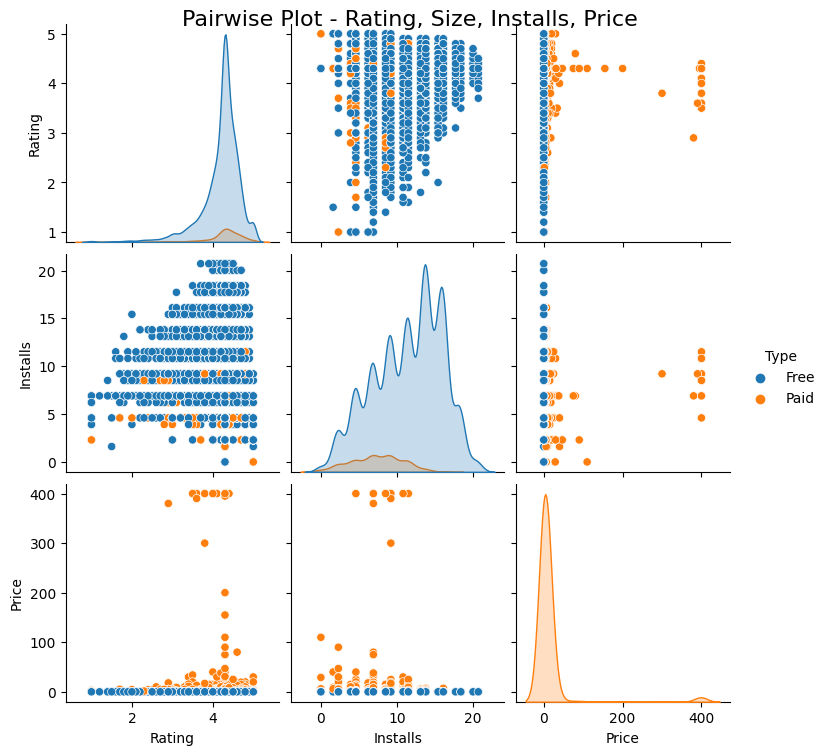

In [42]:
Rating = ps_data['Rating']
Size = ps_data['Size']
Installs = ps_data['Installs']
Type = ps_data['Type']
Price = ps_data['Price']

df_pairplot = sns.pairplot(pd.DataFrame(list(zip(Rating, Size, np.log(Installs), Price, Type)),
                        columns=['Rating','Size', 'Installs', 'Price','Type']), hue='Type')
df_pairplot.fig.suptitle("Pairwise Plot - Rating, Size, Installs, Price",x=0.5, y=1.0, fontsize=16)

#**Kesimpulan:**

* **~92.6%** aplikasi di play store gratis. Dan berbayar atau tidaknya aplikasi ternyata tidak terlalu mempengaruhi rating.
* Rata-rata aplikasi di play store bisa digunakan semua orang tanpa batasan usia **(81.8%)**
* Kategori **Family, Game,** dan **Tools** memiliki jumlah aplikasi terbanyak dibandingkan dengan kategori lainnya.
* kategori **Game, Communication** dan Tools memiliki jumlah penginstalan tertinggi (paling populer) dibandingkan dengan kategori aplikasi lainnya.
* Rata rata rating di play store adalah **4.2.**
* Persentasi aplikasi dengan Rating tinggi adalah **~76%**
* Aplikasi paling populer dengan jumlah review paling tinggi adalah aplikasi sosial media seperti **instagram** dan **facebook**
* **Minecraft** adalah aplikasi dengan revenue pendapatan paling tinggi di play store.
